# Perkenalan Datase

**1. Sumber dataset**
Dataset saya peroleh melalui kaggle pada link ini (https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset)

**2. Ketentuan dataset**
Jumlah kolom: 12 kolom 
* Country (Kategorikal)
Name of the country
* City (Kategorikal)
Name of the city
* AQI Value (Numerikal)
Overall AQI value of the city
* AQI Category (Kategorikal)
Overall AQI category of the city
* CO AQI Value (Numerikal)
AQI value of Carbon Monoxide of the city
* CO AQI Category (Kategorikal)
AQI category of Carbon Monoxide of the city
* Ozone AQI Value (Numerikal)
AQI value of Ozone of the city
* Ozone AQI Category (Kategorikal)
AQI category of Ozone of the city
* NO2 AQI Value (Numerikal)
AQI value of Nitrogen Dioxide of the city
* NO2 AQI Category (Kategorikal)
AQI category of Nitrogen Dioxide of the city

**3. Jumlah Baris: 23.000 data**

**4. Tujuan**
Menghasilkan 3 kategori tingkatan polusi berdasarkan kolom negara dari hasil clustering

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [3]:
df = pd.read_csv('global air pollution dataset.csv')

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [5]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [6]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [7]:
df.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

terdapat 2 kolom yang memiliki nilai null di dalamnya yaitu kolom 'Country' dan 'City'

In [8]:
df['Ozone AQI Category'].unique()

array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy'], dtype=object)

In [9]:
df['CO AQI Category'].unique()

array(['Good', 'Unhealthy for Sensitive Groups', 'Moderate'], dtype=object)

In [10]:
df['NO2 AQI Category'].unique()

array(['Good', 'Moderate'], dtype=object)

In [11]:
df['PM2.5 AQI Category'].unique()

array(['Moderate', 'Good', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous'], dtype=object)

kelima cell code diatas bertujuan untuk mengetahui nilai unique pada category teridiri dari apa saja, untuk mengetahui kadar polusi yang akan dilihat dari kolom value nantinya

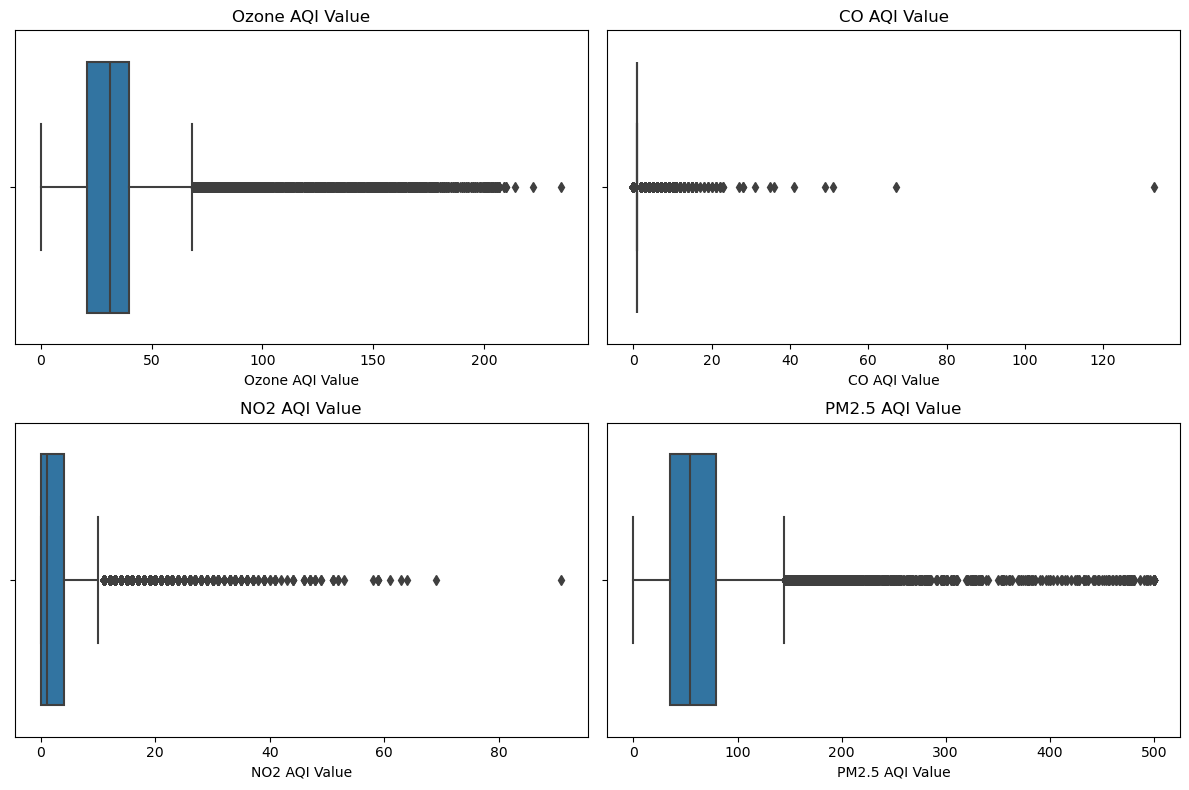

In [12]:
# Membuat figure dan axis untuk 4 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid

# Plot masing-masing AQI dalam subplot berbeda
sns.boxplot(x=df['Ozone AQI Value'], ax=axes[0, 0]).set(title="Ozone AQI Value")
sns.boxplot(x=df['CO AQI Value'], ax=axes[0, 1]).set(title="CO AQI Value")
sns.boxplot(x=df['NO2 AQI Value'], ax=axes[1, 0]).set(title="NO2 AQI Value")
sns.boxplot(x=df['PM2.5 AQI Value'], ax=axes[1, 1]).set(title="PM2.5 AQI Value")

# Menyesuaikan layout agar tidak bertumpuk
plt.tight_layout()

# Menampilkan plot
plt.show()

pada visualisasi ini saya menggunakan box plot untuk melihat seberapa banyak data yang berada di titik outlier dan untuk melihat skweness dan kurtosis dari data masing-masing kolom

In [13]:
df['Ozone AQI Value'].skew()

3.101750386086197

In [14]:
df['CO AQI Value'].skew()

23.084232216858382

In [15]:
df['NO2 AQI Value'].skew()

3.793627544162518

In [16]:
df['PM2.5 AQI Value'].skew()

2.8232624208975357

berdasarkan empar code cell diatas, dapat dilihat skweness pada kolom value **tidak terdistribusi secara normal**, sehingga dapat disimpulan bahwa data pada kolom tersebut membutuhkan proses **scaling** untuk mengatasi pendistribusian data pada dataset ai pollution

# DATA PREPROCESSING

## Data Scaling

In [17]:
df['Ozone AQI Value'] = np.log1p(df['Ozone AQI Value'])
df['CO AQI Value'] = np.log1p(df['CO AQI Value'])
df['NO2 AQI Value'] = np.log1p(df['NO2 AQI Value'])
df['PM2.5 AQI Value'] = np.log1p(df['PM2.5 AQI Value'])

In [18]:
df.dropna(subset=['Country', 'City'], inplace = True)

In [19]:
df['Country_Freq'] = df['Country'].map(df['Country'].value_counts())
df['City_Freq'] = df['City'].map(df['City'].value_counts())

In [20]:
df.drop(['Country', 'City', 'AQI Value', 'AQI Category', 'Ozone AQI Category', 'CO AQI Category','NO2 AQI Category', 'PM2.5 AQI Category' ], axis=1, inplace = True)

mengapa kolom category dihapuskan? karena pada analisis ini hanya akan membutuhkan value saja untuk menganalisis apakah polusi tersebut parah atau tidak sehinggal kolom category perlu di remove atau dihilangkan

# Feature Selection

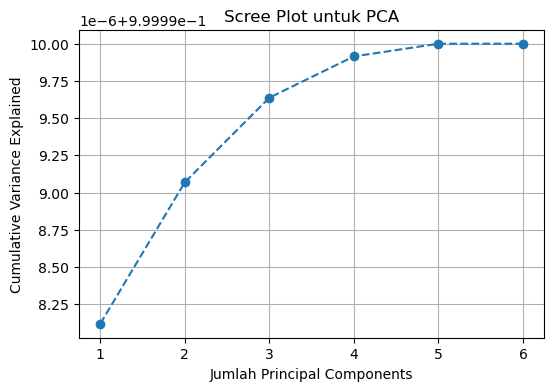

In [21]:
from sklearn.decomposition import PCA

np.random.seed(42)
X = df.iloc[:, :6].values * 10

# PCA tanpa menentukan jumlah komponen
pca = PCA()
pca.fit(X)

# Variance explained oleh setiap komponen
explained_variance = pca.explained_variance_ratio_

# Plot Scree Plot
plt.figure(figsize=(6,4))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Jumlah Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Scree Plot untuk PCA')
plt.grid()
plt.show()

Berdasarkan dari proses PCA diatas yang digunakan untuk memilih fitur optimal, bahwa dimulai dari fitur **5 hingga 6** menunjukkan hasil yang stabil yaitu berada di 10, sehingga untuk proses ini kita hanya akan mengambil **5 fitur saja** sebagai fitur yang digunakan untuk proses kmeans

## Proses Evaluasi Model menggunakan Elbow Method

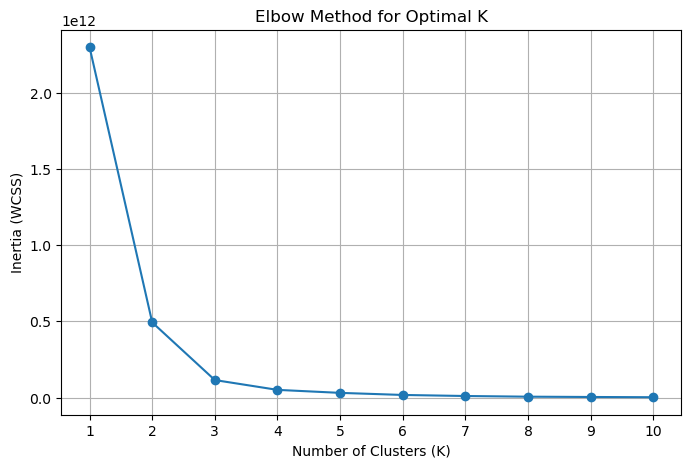

In [22]:
from sklearn.cluster import KMeans

X = df.iloc[:, 0:6].values * 10  

inertia = []
K_range = range(1, 11)  # Maksimal K = jumlah baris dalam X

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Simpan inertia (distorsi)


plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.xticks(K_range)
plt.grid(True)
plt.show()


Berdasarkan hasil dari elbow method dapat dilihat bahwa titik elbow berada pada**cluster ke 3**, dan mulai stabil pada cluster ke 8-10

## Evaluasi Model Kmeans Menggunakan Sillhouette Score

In [23]:
from sklearn.metrics import silhouette_score

# Loop untuk jumlah cluster dari 2 hingga 8
for k in range(2, 9):  
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X)  # Gunakan X yang sudah ada
    score = silhouette_score(X, labels)
    print(f"Silhouette Score untuk k={k}: {score:.4f}")

Silhouette Score untuk k=2: 0.6950
Silhouette Score untuk k=3: 0.7380
Silhouette Score untuk k=4: 0.7541
Silhouette Score untuk k=5: 0.7887
Silhouette Score untuk k=6: 0.7612
Silhouette Score untuk k=7: 0.7775
Silhouette Score untuk k=8: 0.7945


Hasil silhouette score **cluster = 3 menunjukkan nilai 0,73** sementara yang paling tinggi berada di cluster = 8 yaitu 0,79. tetapi karena tujuan dari analisis ini ingin membagi menjadi 3 bagian yaitu **"Hight Pollution", "Moderate Pollution" dan "Low pollution"**, maka **cluster = 3 akan dipilih untuk proses visualisasi nantinya**

In [24]:
# Misalkan kita memiliki X dengan banyak fitur
X = df[['Ozone AQI Value', 'CO AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']]

# Lakukan PCA
pca = PCA(n_components=2)
pca.fit(X)

# Ambil loading matrix untuk melihat kontribusi tiap fitur
loading_matrix = abs(pca.components_)

# Pilih 2 fitur dengan kontribusi terbesar pada komponen pertama
top_2_features = X.columns[loading_matrix[0].argsort()[-2:]].tolist()
print("Fitur yang dipilih:", top_2_features)

Fitur yang dipilih: ['PM2.5 AQI Value', 'NO2 AQI Value']


pada code cell diatas digunakan untuk menentukan fitur yang paling domminan berkontribusi pada model, karena untuk proses visualisasi hanya dapat menggunakan 2 variabel saja sehingga proses PCA diperlukan dan output menunjukkan bahwa **PM2.5 AQI Value', 'NO2 AQI** Value adalah yang paling tinggi dan akan digunakan sebagai nilai X dan Y untuk visualisasi 

# Visualisasi Hasil Clustering KMeans

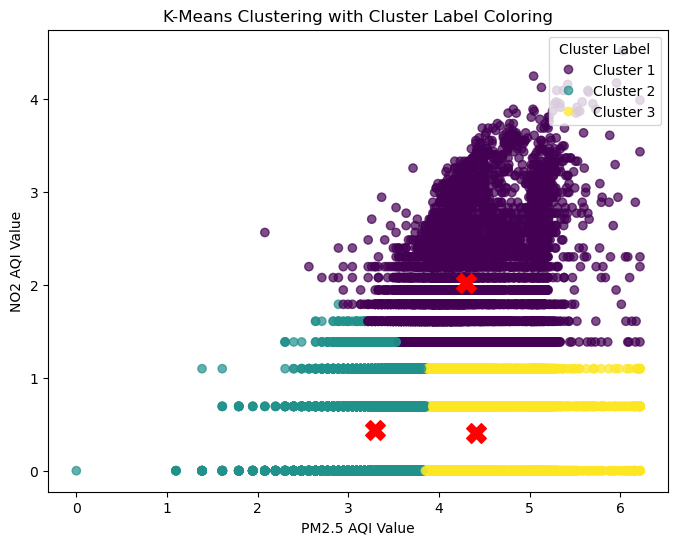

In [25]:
# Memilih dua fitur untuk clustering dan visualisasi
X_selected = df[['PM2.5 AQI Value', 'NO2 AQI Value']].values  # Menggunakan dua fitur tertentu

# Menentukan jumlah cluster
k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)

# Melakukan clustering
labels = kmeans.fit_predict(X_selected)

# Menambahkan 1 ke label agar dimulai dari 1, bukan 0
labels_adjusted = labels + 1  

# Plot hasil clustering dengan warna berdasarkan label cluster
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_selected[:, 0], X_selected[:, 1], c=labels_adjusted, cmap='viridis', alpha=0.7)

# Menampilkan centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')

# Menyesuaikan legend agar menampilkan label dari 1,2,3
legend_labels = {i + 1: f"Cluster {i + 1}" for i in range(k)}
handles, _ = scatter.legend_elements()
plt.legend(handles, legend_labels.values(), title="Cluster Label", loc="upper right")

# Label dan judul
plt.xlabel("PM2.5 AQI Value")
plt.ylabel("NO2 AQI Value")
plt.title("K-Means Clustering with Cluster Label Coloring")

# Menampilkan plot
plt.show()

Berdasarkan dari hasil visualisasi clustering diatas bahwa cluster 1 (ungu) adalah cluster yang menunjukkan angka NO2 dan PM2.5 paling tinggi sehingga data yang berada pada cluster tersebut akan di berikan label **"High Pollution"**. Untuk cluster 2 (Hijau) menunjukkan nilai yang rendah untuk kedua variabel maka **cluster ke 2 akan diberi label "Low Pollution"**. Cluster terakhir yaitu cluster 3 mamiliki nilai NO2 yang rendah tetapi PM2,5 yang cukup tinggi sehingga **cluster 3 akan diberi label "Moderate Polution"**

In [26]:
# Menentukan jumlah cluster terbaik
k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)

# Melakukan clustering menggunakan semua fitur yang digunakan sebelumnya
df['cluster_label'] = kmeans.fit_predict(X_selected) + 1 

# Menampilkan 5 baris pertama untuk memastikan kolom baru telah ditambahkan
print(df.head())

   CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value  \
0      0.693147         3.610918       0.000000         3.951244   
1      0.693147         1.791759       0.693147         3.737670   
2      0.693147         3.688879       1.098612         4.204693   
3      0.693147         3.555348       0.000000         3.044522   
4      0.000000         3.135494       0.000000         1.945910   

   Country_Freq  City_Freq  cluster_label  
0          1241          1              3  
1          1562          1              2  
2           979          1              3  
3           389          1              2  
4           802          1              2  


In [27]:
df.head()

,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,Country_Freq,City_Freq,cluster_label
0,0.693147,3.610918,0.000000,3.951244,1241,1,3
1,0.693147,1.791759,0.693147,3.737670,1562,1,2
2,0.693147,3.688879,1.098612,4.204693,979,1,3
3,0.693147,3.555348,0.000000,3.044522,389,1,2
4,0.000000,3.135494,0.000000,1.945910,802,1,2


In [28]:
df.to_csv("kmeans_pollution.csv", index=False)

Data hasil clustering disimpan dalam dataset bernama kmeans_pollution.csv yang dimana dataset tersebut akan digunakan untuk proses klasifikasi nanti

In [29]:
df.head()

,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,Country_Freq,City_Freq,cluster_label
0,0.693147,3.610918,0.000000,3.951244,1241,1,3
1,0.693147,1.791759,0.693147,3.737670,1562,1,2
2,0.693147,3.688879,1.098612,4.204693,979,1,3
3,0.693147,3.555348,0.000000,3.044522,389,1,2
4,0.000000,3.135494,0.000000,1.945910,802,1,2


In [32]:
from scipy import stats

def mode_func(x):
    return stats.mode(x, keepdims=True)[0][0]

# Agregasi
agg_funcs = {
    "CO AQI Value": ["min", "max", "mean"],
    "Ozone AQI Value": ["min", "max", "mean"],
    "NO2 AQI Value": ["min", "max", "mean"],
    "PM2.5 AQI Value": ["min", "max", "mean"],
    "Country_Freq": mode_func,
    "City_Freq": mode_func
}

# Group by cluster label dan agregasi
result = df.groupby("cluster_label").agg(agg_funcs)

# Tampilkan hasil
print(result)

              CO AQI Value                     Ozone AQI Value            \
                       min       max      mean             min       max   
cluster_label                                                              
1                      0.0  4.897840  1.028867             0.0  5.463832   
2                      0.0  1.098612  0.490734             0.0  4.836282   
3                      0.0  4.219508  0.746056             0.0  5.347108   

                        NO2 AQI Value                     PM2.5 AQI Value  \
                   mean           min       max      mean             min   
cluster_label                                                               
1              3.094400      1.386294  4.521789  2.019682        2.079442   
2              3.318547      0.000000  1.791759  0.435177        0.000000   
3              3.652931      0.000000  1.098612  0.408610        3.850148   

                                  Country_Freq City_Freq  
                    m

# Kesimpulan

## Analisis Data Berdasarkan Agregasi

Berdasarkan hasil agregasi data yang dikelompokkan berdasarkan **cluster_label**, berikut adalah analisis per klaster berdasarkan nilai rata-rata (mean) dan distribusi nilai minimum (min) serta maksimum (max) dari setiap variabel:  

### **Klaster 1**  
- **CO AQI Value** memiliki rata-rata **1.0289**, dengan nilai minimum **0.0** dan maksimum **4.8978**, menunjukkan bahwa tingkat polusi CO dalam klaster ini cukup rendah secara rata-rata, meskipun ada beberapa titik dengan kadar yang lebih tinggi.  
- **Ozone AQI Value** memiliki rata-rata **3.0944**, dengan minimum **0.0** dan maksimum **5.4638**, menunjukkan variasi yang signifikan dalam kualitas udara terkait ozon.  
- **NO2 AQI Value** memiliki rata-rata **2.0197**, dengan minimum **1.3863** dan maksimum **4.5218**, menunjukkan tingkat NO2 yang cukup bervariasi dalam klaster ini.  
- **PM2.5 AQI Value** memiliki rata-rata **4.3006**, dengan minimum **2.0794** dan maksimum **6.2166**, menandakan bahwa polutan PM2.5 dalam klaster ini cenderung lebih tinggi dibanding polutan lainnya.  
- **Country_Freq** menunjukkan bahwa negara dengan frekuensi terbanyak dalam klaster ini memiliki kode **2872**, yang bisa merepresentasikan negara dominan dalam data ini.  
- **City_Freq** memiliki nilai **1**, yang berarti hanya ada satu kota dominan dalam klaster ini.  

### **Klaster 2**  
- **CO AQI Value** memiliki rata-rata **0.4907**, dengan nilai minimum **0.0** dan maksimum **1.0986**, menunjukkan bahwa tingkat polusi CO dalam klaster ini relatif lebih rendah dibandingkan klaster 1.  
- **Ozone AQI Value** memiliki rata-rata **3.3185**, dengan minimum **0.0** dan maksimum **4.8363**, menunjukkan kualitas udara yang bervariasi tetapi lebih rendah dibanding klaster 1.  
- **NO2 AQI Value** memiliki rata-rata **0.4352**, dengan minimum **0.0** dan maksimum **1.7918**, yang menunjukkan bahwa tingkat NO2 dalam klaster ini sangat rendah dibanding klaster lainnya.  
- **PM2.5 AQI Value** memiliki rata-rata **3.2909**, dengan minimum **0.0** dan maksimum **3.8501**, menunjukkan bahwa klaster ini memiliki tingkat polusi PM2.5 yang lebih rendah dibanding klaster 1.  
- **Country_Freq** menunjukkan negara dengan kode **1562** sebagai yang paling sering muncul dalam klaster ini.  
- **City_Freq** tetap bernilai **1**, yang berarti hanya ada satu kota dominan dalam klaster ini.  

### **Klaster 3**  
- **CO AQI Value** memiliki rata-rata **0.7461**, dengan nilai minimum **0.0** dan maksimum **4.2195**, menunjukkan tingkat polusi CO yang lebih tinggi dibanding klaster 2 tetapi lebih rendah dari klaster 1.  
- **Ozone AQI Value** memiliki rata-rata **3.6529**, dengan minimum **0.0** dan maksimum **5.3471**, menunjukkan variasi kualitas udara yang lebih luas dibanding klaster lainnya.  
- **NO2 AQI Value** memiliki rata-rata **0.4086**, dengan minimum **0.0** dan maksimum **1.0986**, menandakan bahwa tingkat NO2 di klaster ini cukup rendah.  
- **PM2.5 AQI Value** memiliki rata-rata **4.4082**, dengan minimum **3.8501** dan maksimum **6.2166**, yang menunjukkan bahwa klaster ini memiliki tingkat polusi PM2.5 tertinggi dibandingkan klaster lainnya.  
- **Country_Freq** menunjukkan negara dengan kode **2488** sebagai yang paling sering muncul dalam klaster ini.  
- **City_Freq** tetap bernilai **1**, yang berarti hanya ada satu kota dominan dalam klaster ini.  

### **Kesimpulan**  
- Klaster 1 memiliki **tingkat polusi tertinggi untuk PM2.5** dan **NO2**, sementara CO dan Ozone juga cukup tinggi.  
- Klaster 2 memiliki **tingkat polusi paling rendah secara umum**, terutama pada NO2 dan PM2.5, yang menandakan kualitas udara yang lebih baik.  
- Klaster 3 memiliki **PM2.5 AQI yang paling tinggi**, tetapi CO dan NO2 tetap lebih rendah dibanding klaster 1.  


## Analisis data berdasarkan skor evaluasi

Dalam analisis clustering yang dilakukan menggunakan model K-Means, ditemukan bahwa jumlah cluster yang **optimal adalah 8, dengan silhouette score sebesar 0,79**. Namun, karena tujuan utama dari analisis ini adalah untuk mengelompokkan data berdasarkan tiga kategori tingkat polusi di setiap negara, maka diputuskan untuk menggunakan jumlah cluster sebanyak 3.

**Meskipun penggunaan 3 cluster menghasilkan silhouette score yang sedikit lebih rendah, yaitu 0,73, pendekatan ini lebih sesuai dengan tujuan analisis yang telah ditetapkan sejak awal.**